In [1]:
#importing libraries
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

#loading data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

#data cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
#filtering data
df_DA_CZ = df[(df['job_title_short']=='Data Analyst')&(df['job_country']=='Czechia')].copy()
df_DA_SK = df[(df['job_title_short']=='Data Analyst')&(df['job_country']=='Slovakia')].copy()
#replacing inconsistent values
df_DA_CZ['job_location'] = df_DA_CZ['job_location'].replace({'Czechia': 'Czechia Remote', 'Anywhere': 'Czechia Remote'})
df_DA_SK['job_location'] = df_DA_SK['job_location'].replace({'Slovakia': 'Slovakia Remote', 'Anywhere': 'Slovakia Remote'})
#concatinating the dataframes
df_DA_CZSK = pd.concat([df_DA_CZ, df_DA_SK], ignore_index=True)

In [3]:
df_DA_CZSK['job_posted_month_no'] = df_DA_CZSK['job_posted_date'].dt.month

In [4]:
df_DA_CZSK_explode = df_DA_CZSK.explode('job_skills')

In [5]:
df_DA_CZSK_pivot = df_DA_CZSK_explode.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)

df_DA_CZSK_pivot.loc['Total'] = df_DA_CZSK_pivot.sum()

df_DA_CZSK_pivot = df_DA_CZSK_pivot[df_DA_CZSK_pivot.loc['Total'].sort_values(ascending=False).index]

df_DA_CZSK_pivot = df_DA_CZSK_pivot.drop('Total')

In [6]:
#calculating percenages of total
DA_totals = df_DA_CZSK.groupby('job_posted_month_no').size()
df_DA_CZSK_percent = df_DA_CZSK_pivot.div(DA_totals/100, axis=0)

In [7]:
#changing month number to month name
df_DA_CZSK_percent = df_DA_CZSK_percent.reset_index()
df_DA_CZSK_percent['job_posted_month'] = df_DA_CZSK_percent['job_posted_month_no'].apply(lambda x: pd.to_datetime(str(x), format='%m').strftime('%b'))
df_DA_CZSK_percent = df_DA_CZSK_percent.set_index('job_posted_month')
df_DA_CZSK_percent = df_DA_CZSK_percent.drop(columns='job_posted_month_no')

df_DA_CZSK_percent

job_skills,sql,python,excel,power bi,tableau,r,sap,azure,go,aws,...,node.js,perl,redis,nuix,tensorflow,tidyverse,visio,vmware,visual basic,zoom
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,57.342657,27.972028,33.566434,28.671329,13.986014,16.783217,20.979021,9.090909,6.293706,3.496503,...,0.699301,0.699301,0.699301,0.000000,0.000000,0.000000,0.699301,0.699301,0.000000,0.699301
Feb,61.165049,39.805825,27.184466,22.330097,16.504854,25.242718,6.796117,9.708738,8.737864,11.650485,...,0.000000,0.000000,0.000000,0.000000,0.970874,0.000000,0.000000,0.000000,0.000000,0.000000
Mar,55.670103,36.082474,32.989691,22.680412,22.680412,22.680412,10.309278,4.123711,5.154639,5.154639,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.030928,0.000000,0.000000,0.000000,0.000000
Apr,43.548387,27.419355,34.677419,17.741935,17.741935,12.903226,8.870968,8.064516,5.645161,1.612903,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
May,44.036697,22.935780,33.027523,16.513761,22.018349,10.091743,13.761468,1.834862,5.504587,2.752294,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Jun,54.901961,32.352941,22.549020,36.274510,33.333333,15.686275,10.784314,14.705882,4.901961,6.862745,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Jul,46.086957,28.695652,26.956522,26.086957,21.739130,5.217391,6.956522,10.434783,7.826087,5.217391,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Aug,55.200000,35.200000,24.000000,24.800000,25.600000,8.000000,10.400000,6.400000,8.800000,8.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Sep,51.515152,30.303030,46.969697,31.818182,24.242424,9.090909,15.151515,3.030303,4.545455,6.060606,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.515152,0.000000


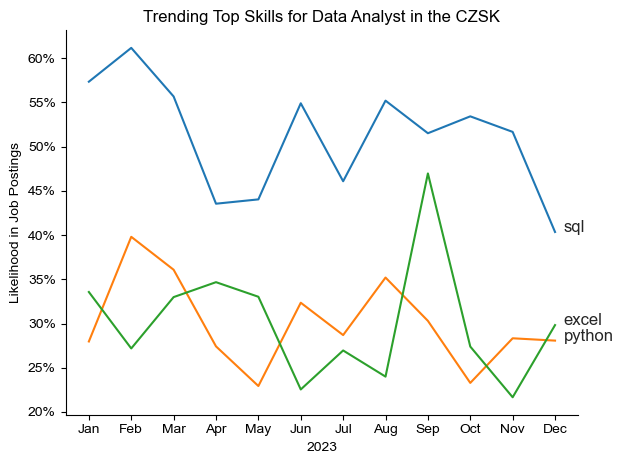

In [8]:
df_plot = df_DA_CZSK_percent.iloc[:,:3]

sns.lineplot(data = df_plot, dashes=False, palette='tab10')
sns.set_theme(style='ticks')
plt.xlabel('2023')
plt.ylabel('Likelihood in Job Postings')
plt.title('Trending Top Skills for Data Analyst in the CZSK')
plt.legend().remove()
sns.despine()

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))

for i in range(3):
    plt.text(11.2, df_plot.iloc[-1, i], df_plot.columns[i])

plt.tight_layout()
plt.show()